Pandas 라이브러리를 활용하여 데이터파일 불러오기 및 저장하기

In [1]:
!pip install pandas

In [2]:
!pip install openpyxl

**필수라이브러리**

Pandas는 대부분의 통계 및 데이터프레임을 효과적으로 다루기 위해 필요합니다.\
matplotlib 는 다양한 그래프를 그릴 때 사용하는 라이브러리입니다.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl

**구글 콜랩에서 구글드라이브 사용권한 허용**

구글 콜랩을 사용하여 데이터를 불러올 때, 자신의 구글 드라이브에 데이터를 업로드 하고 드라이브를 클라우드서버에 마운트 하여 구글 드라이브의 저장공간에 데이터를 읽거나 쓸 수 있는 권환을 획득하여야 합니다.\
google.colab이라는 패키지에 있는 drive라이브러리를 활용합니다.\
drive.mount라는 함수를 사용하면 드라이브를 클라우드머신에 마운트할 수 있습니다.\
좌측의 사이드바 메뉴를 클릭하여 폴더의 경로를 확인할 수 있습니다.

In [4]:

# Read the data
data = pd.read_excel('height_weight.xlsx')
print(data)

       height  weight
0       175.0    59.0
1       179.7    70.4
2       178.7    60.8
3       163.7    52.3
4       174.9   102.8
...       ...     ...
18037   175.0    63.0
18038   173.0    89.0
18039   172.0    75.0
18040   175.0    51.0
18041   170.0    78.0

[18042 rows x 2 columns]


**기술통계량**

리스트에 .mean(), .var(), .std(), .median(), .quantile(), .skew() 등 다양한 옵션을 주어 기술통계량을 계산할 수 있다.\
.value_counts()옵션을 통해 빈도를 계산할 수 있다.

In [5]:
meanh = data.height.mean()
varh = data.height.var()
stdh = data.height.std()
medh = data.height.median()
quantile35h = data.height.quantile(.35) #35percentile
skewh = data.height.skew()
kurtoh = data.height.kurtosis()
minh = data.height.min()
maxh = data.height.max()
print("mean of the height is", meanh)
print("standard deviation of heights is", stdh)
print(data.weight.value_counts())
print(minh, maxh)

mean of the height is 173.35823633743487
standard deviation of heights is 5.8815498868558
60.0     177
65.0     153
61.0     149
66.0     144
67.0     135
        ... 
115.7      1
129.2      1
110.4      1
111.4      1
37.0       1
Name: weight, Length: 861, dtype: int64
145.0 198.3


**자료의 분포**

데이터의 분포를 관찰하는 가장 기초적인 방법은 histogram을 그려보는 것 입니다. 평균과 표준편차 그리고 자료의 centralilty 및 outlier를 확인하는데에는 boxplot을 활용하는 것이 좋습니다.\
histogram함수는 matplotlib.pyplot.hist 로 불러옵니다.

<function matplotlib.pyplot.show(close=None, block=None)>

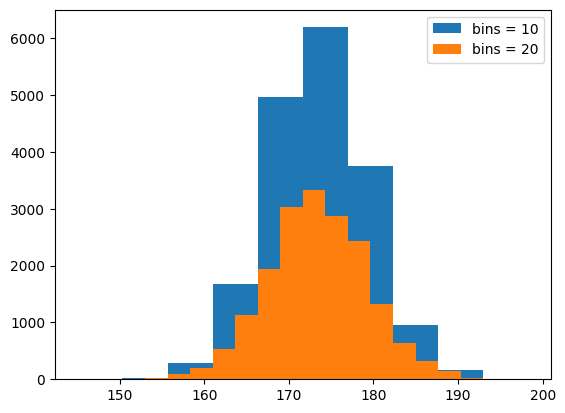

In [6]:
plt.hist(data.height, bins = 10, label = 'bins = 10')
plt.legend()
plt.show

plt.hist(data.height, bins = 20, label = "bins = 20")
plt.legend()
plt.show

{'whiskers': [<matplotlib.lines.Line2D at 0x7d269050d930>,
 'caps': [<matplotlib.lines.Line2D at 0x7d269050de70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d269050d690>],
 'medians': [<matplotlib.lines.Line2D at 0x7d269050e3b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d269050e650>],
 'means': []}

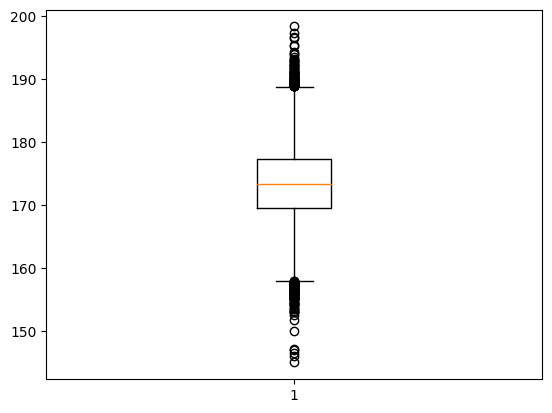

In [7]:
plt.boxplot(data.height, vert = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d268e24fb50>,
 'caps': [<matplotlib.lines.Line2D at 0x7d268e2840d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d268e24f8b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d268e284610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d268e2848b0>],
 'means': []}

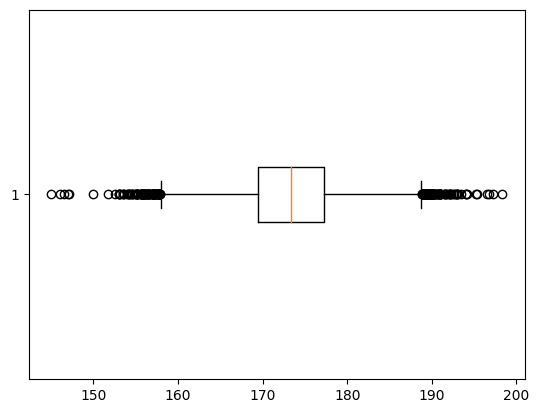

In [8]:
plt.boxplot(data.height, vert = False)

**Bar 차트, Pie 차트**

범주형 변수인 경우에는 Bar chart, pie chart 등을 활용할 수 있습니다.

In [9]:
# 우선 키를 150센치미터 이하로 시작하여 10cm단위로 구분한 도수분포표를 만듭니다.
# bin the heights into intervals of 10 cm, starting from smaller than 150 and upper bound higher than 190
bins = pd.IntervalIndex.from_tuples([(x, x+10) for x in range(150, 200, 10)] + [(200, pd.np.inf)])
heights_binned = pd.cut(data.height, bins=bins)

# count the frequency of each interval
frequency_table = heights_binned.value_counts(sort=False)

# create a new DataFrame from the frequency counts and print it
df = pd.DataFrame({'Height Interval': frequency_table.index, 'Frequency': frequency_table.values})
print(df)

  Height Interval  Frequency
0  (150.0, 160.0]        230
1  (160.0, 170.0]       4947
2  (170.0, 180.0]      10706
3  (180.0, 190.0]       2104
4  (190.0, 200.0]         49
5    (200.0, inf]          0


<ipython-input-9-ff60a2fe6b5c>:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  bins = pd.IntervalIndex.from_tuples([(x, x+10) for x in range(150, 200, 10)] + [(200, pd.np.inf)])


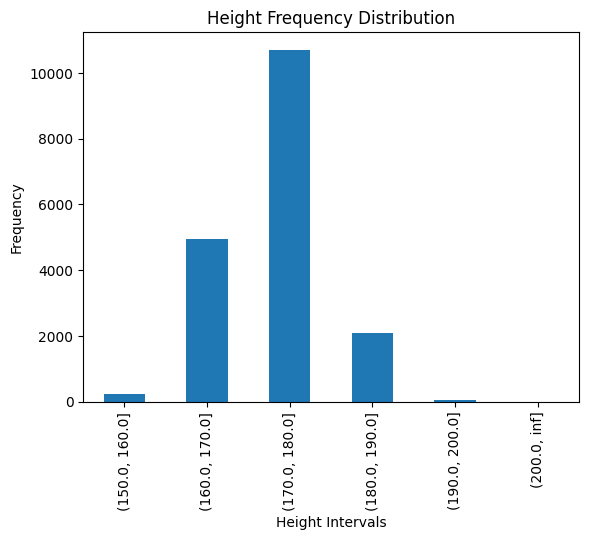

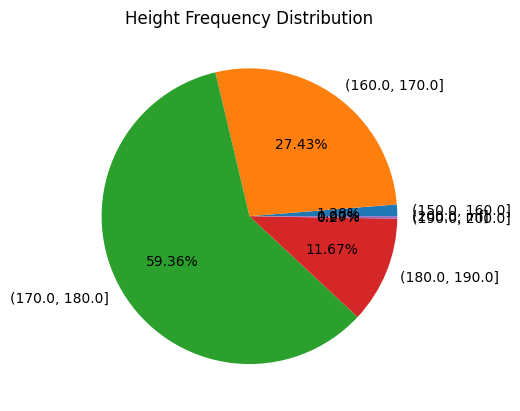

In [10]:
frequency_table.plot(kind="bar")
plt.title('Height Frequency Distribution')
plt.xlabel('Height Intervals')
plt.ylabel('Frequency')
plt.show()

plt.pie(frequency_table, labels=frequency_table.index, autopct='%1.2f%%')
plt.title('Height Frequency Distribution')
plt.show()

**산점도와 추세선**

2개의 변수가 결합된 자료는 산점도를 통해 분포와 선형성 등을 확인해볼 수 있습니다.

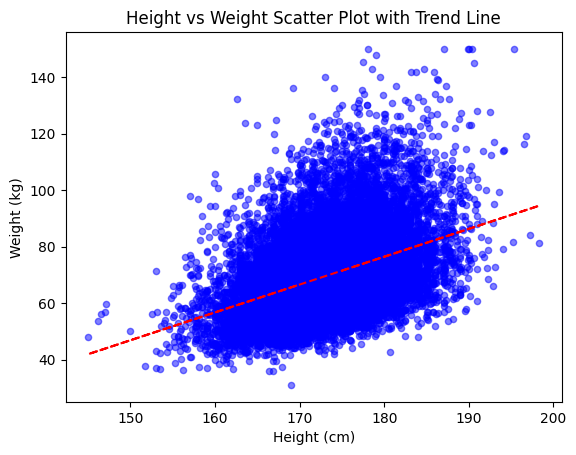

In [13]:
import numpy as np

# create a scatter plot of height and weight data
ax = data.plot(kind='scatter', x='height', y='weight', color='blue', alpha=0.5)

# add trend line to the scatter plot
z = np.polyfit(data['height'], data['weight'], 1)
p = np.poly1d(z)
plt.plot(data['height'], p(data['height']), "r--")

# add axis labels and title to the plot
ax.set_xlabel('Height (cm)')
ax.set_ylabel('Weight (kg)')
ax.set_title('Height vs Weight Scatter Plot with Trend Line')

# show the plot
plt.show()


두 변수간의 관계는 보통 Correlation과 Covariance로 설명합니다. Correlation은 선형성에 관한 지수로 -1이면 부(-)적으로 선형이고 1이면 정(+)적으로 선형입니다. 0이면 비선형적인 분포를 의미합니다.\
Covariance는 두 변수가 얼마나 같이 변화하느냐를 측정하여 변화의 방향 및 트렌드를 나타냅니다.

In [14]:
corr = data['height'].corr(data['weight'])
print('Correlation: ', corr)

# calculate the covariance of height and weight
cov = data['height'].cov(data['weight'])
print('Covariance: ', cov)

Correlation:  0.3990772453221343
Covariance:  34.111862163091644


**집단간 비교**

두 집단간의 평균비교는 t-test를 사용합니다. 독립적인 두 그룹간의 평균비교는 독립표본 t-test를 사용합니다. 서로 연관이 있는 두 집단(예를들어 전/후 비교 등)는 paired t-test를 이용하는게 좋습니다.

In [15]:
import scipy.stats as stats
# divide data into two groups
data['group'] = [1]*10000 + [2]*8042
print(data)

       height  weight  group
0       175.0    59.0      1
1       179.7    70.4      1
2       178.7    60.8      1
3       163.7    52.3      1
4       174.9   102.8      1
...       ...     ...    ...
18037   175.0    63.0      2
18038   173.0    89.0      2
18039   172.0    75.0      2
18040   175.0    51.0      2
18041   170.0    78.0      2

[18042 rows x 3 columns]


In [16]:
# independent group t-test
group1 = data.loc[data['group']==1, "height"]
group2 = data.loc[data['group']==2, "height"]
t_stat, p_value = stats.ttest_ind(group1, group2)

print("t-statistics:", t_stat)
print("p-value:", p_value)

t-statistics: 1.754833249602208
p-value: 0.0793048086380736


In [17]:
from scipy.stats import ttest_rel

# create a DataFrame with paired data
df = pd.DataFrame({'before': [10, 12, 14, 16, 18],
                   'after': [12, 14, 14, 18, 19]})

# perform paired t-test
t, p = ttest_rel(df['before'], df['after'])

# print the t-statistic and p-value
print('t-statistic:', t)
print('p-value:', p)


t-statistic: -3.4999999999999996
p-value: 0.02489616346022276


세 개 이상의 그룹간의 비교는 분산분석 (ANOVA: Analysis of Variance)를 활용합니다.

In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data['group2'] = ['A']*6000 + ['b']*6000 + ['c']*6042
# fit a one-way ANOVA model
model = ols('weight ~ group2', data=data).fit()

# perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# print the ANOVA table
print(anova_table)

                sum_sq       df         F    PR(>F)
group2    4.824993e+02      2.0  1.142247  0.319124
Residual  3.809947e+06  18039.0       NaN       NaN


**과제1**\
sent_and_emotion.csv는 특정기간동안 트워터의 텍스트를 수집하여 감정분석 한 결과이다. sentment는 트윗이 긍정적(positive)인지, 부정적(negative)인지 아니면 중립적(neutral)인지 구분하였고, emotion은 각 트윗의 감정을 구분하였다.

1. sentiment와 emotion이 각각 몇개씩 있는지 빈도를 구하세요.
2. 날짜별로 각 sentiment와 emotion이 어떻게 나타나는지 구하세요.
3. 2번의 결과를 바탕으로 sentiment의 일자별 추이를 그래프로 나타내세요.
4. 2번의 결과를 바탕으로 emotion의 일자별 추이를 그래프로 나타내세요.

**과제2**

mlb_sample.csv 파일은 2000년부터 2014년 시즌까지의 미국 메이저리그 30개 구단의 승률(wp), 승리횟수(w), 포스트시즌 진출여부(ps), 월드시리즈 진출여부(ws), 소속리그(AL, American league 팀은 1, national league 팀은 0), 팀의 revenue (rev, million dollars), 홈지역의 인구(smsa)를 조사한 자료 입니다.


1.   메이저리그 팀의 수익(revenue)의 평균, 표준편차, 중간값, 20%, 40%, 60%, 80% 값을 구하세요.
2.   메이저리그 팀의 수익에 대한 히스토그램과 박스플롯을 작성하세요.
3.   각 팀별 홈타운의 15년간 평균인구에 대한 Bar chart를 작성하세요.
4.   승률과 수익간의 인과관계에 대해 산점도와 추세선을 그리고 상관관계 및 공분산을 구하세요.
5.   American league 팀들이 National league팀에 비해 수익이 많은지 검정하세요.



**과제3**\
mlb_sample_NAs.csv는 몇개의 missing value가 있는 파일입니다. 파일의 missing value 를 처리하여 연구에 적합한 데이터세트를 구성하세요.